**1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain**

**Answer:**

To perform a matrix multiplication between a **(n,k) and (k,m)** matrix, we need **nmk** multiplications and **nm(k-1)** additions.

When we multiply 2 matrices of (n x k) and (k x m) dimensions, we will get the resulting matrix of dimensions **(n x m)**. 

Each element of a resulting matrix is a summation of the product of corresponding elements in the row of (n,k) matrix and column of (k,m) matrix.

Thus, multiplication is done **k** times and addition is done **k-1** times to get a single element in a resulting matrix and we appearntly have (n x m) elements in the resulting matrix. 

Thus, total multiplications = **nmk** and total additions = **nm(k-1)**


**2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

In [1]:
def matrix_multiplication(A, B):
  #If no. of columns in matrix A is not equal to no. of rows in matrix B, then matrix multiplication can't be done
    if len(A[0]) != len(B):
        return None

    result = []
    for i in range(len(A)):
      l = []
      for j in range(len(B[0])):
        l.append(0)
      result.append(l)


    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]

    return result

In [2]:
import numpy as np

def matrix_multiplication_numpy(A, B):
    return np.matmul(A, B)

def matrix_multiplication_numpy2(A, B):
  return np.dot(A, B)

In [3]:
import timeit

A = [[1, 2, 3], [4, 5, 6]]
B = [[7, 8, 9], [3, 4, 5], [1, 5, 7]]

print("Computing Time List of lists:", timeit.timeit('matrix_multiplication(A, B)', globals=globals(), number=100000))
print("Computing Time Numpy matmul:", timeit.timeit('matrix_multiplication_numpy(A, B)', globals=globals(), number=100000))
print("Computing Time Numpy dot:", timeit.timeit('matrix_multiplication_numpy2(A, B)', globals=globals(), number = 100000))

Computing Time List of lists: 0.6489228660000208
Computing Time Numpy matmul: 0.5777022489999126
Computing Time Numpy dot: 0.7583488699999634


From the result above, we can conclude that the implementation using **numpy is faster compared to the list of lists implementation**. And the reason might be the use of **compiled C code in numpy** over the pure python compilation of list of lists approach. 

**3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

Time complexity of finding the median of the array will be **O(n^2)**.
Another approach would be to initially sort the array, and then find the median of the array in a single pass. The average time complexity of sorting (merge sort) an array is **O(n logn)**

In [4]:
def findmedian(arr):
    if not arr:
        return None
    arr.sort()
    pivot = arr[len(arr) // 2]
    return pivot

In [5]:
def findmedian_numpy(arr, k):
  return np.median(arr)

In [6]:
import timeit

arr = [5, 7, 3, 1, 2, 6, 4]
#print(findmedian(arr))
#print(findmedian_numpy(arr, len(arr)//2))
print("Computing Time sorting:", timeit.timeit('findmedian(arr)', globals=globals(), number=10000))
print("Computing Time np median:", timeit.timeit('findmedian_numpy(arr, len(arr)//2)', globals=globals(), number=10000))


Computing Time sorting: 0.005112373999963893
Computing Time np median: 0.19176906300003793


From the result above, we can conclude that the **implementation using numpy is slower compared to the sorting approach**. 

**4. What is the gradient of the following function with respect to x and y?**  
**Answer:**                                                                     
The gradient of the given function w.r.to **x** is, **2xy + y^3cos(x)**         
The gradient of the given function w.r.to **y** is, **x^2 + 3y^2sin(x)**




**5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y**



In [7]:
!pip install jax

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import jax.numpy as jnp
from jax import grad

def f(x,y):
  return (x**2)*y + (y**3)*jnp.sin(x)

dfdx, dfdy = grad(f, [0, 1])(2.0, 3.0)

print("Gradient w.r.to x:", dfdx)
print("Gradient w.r.to y:", dfdy)

Gradient w.r.to x: 0.7640362
Gradient w.r.to y: 28.551031


**6. Use sympy to confirm that you obtain the same gradient analytically.**

In [15]:
import sympy as sp

x, y = sp.symbols('x y')

f = (x**2)*y + (y**3)*sp.sin(x)

#To take derivative we use 'diff' function in sympy

delta_x = sp.diff(f, x)
delta_y = sp.diff(f, y)

print(delta_x)  
print(delta_y)

2*x*y + y**3*cos(x)
x**2 + 3*y**2*sin(x)


Results Verified !

**7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.**

In [17]:
Students = {
    2022: {
        'Branch 1': {
            1: {'Name': 'N',
                'Marks': {'Maths': 100, 'English': 70 #Add more courses/marks
                          }},
            # Add more students
        },
        'Branch 2': {
            41: {'Name': 'M', 'Marks': {'Maths': 90, 'English': 90}},
            # more students
        },
    },
    2023: {
        'Branch 1': {
            1: {'Name': 'Name1', 'Marks': {'Maths': 100, 'English': 70}},
            # Add more students
        },
        'Branch 2': {
            41: {'Name': 'Name2', 'Marks': {'Maths': 90, 'English': 90}},
            # more students
        },
    },
    2024: {
        'Branch 1': {
            1: {'Name': 'Name1', 'Marks': {'Maths': 100, 'English': 70}},
            # Add more students
        },
        'Branch 2': {
            41: {'Name': 'Name2', 'Marks': {'Maths': 90, 'English': 90}},
            # more students
        },
    },
    2025: {
        'Branch 1': {
            1: {'Name': 'Name1', 'Marks': {'Maths': 100, 'English': 70}},
            # Add more students
        },
        'Branch 2': {
            41: {'Name': 'Name2', 'Marks': {'Maths': 90, 'English': 90}},
            # more students
        },
    },
}


Here, keys in the value dictionary of 'Branch 1' and 'Branch 2' represent the Roll Numbers of students, and the values contains Name and Marks of the students.

**8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.**



In [21]:
class Year:
    def __init__(self, branches):
        self.branches = branches


class Branch:
    def __init__(self, students):
        self.students = students

      
class Student:
    def __init__(self, Name, RollNumber, marks):
        self.Name = Name
        self.RollNumber = RollNumber
        self.marks = marks


class Database:
    def __init__(self, years):
        self.years = years

# Define instances of class Student
student1 = Student('Name1', 1, {'Maths': 100, 'English': 70})
student2 = Student('Name2', 2, {'Maths': 90, 'English': 90})

# Define instances of class Branch
Branch1 = Branch([student1, student2])
Branch2 = Branch([student1])

# Define instances of class Year
year1 = Year([Branch1, Branch2])
year2 = Year([Branch1])

# Define instances of class Database
database = Database([year1, year2])

In this example, the **Database** class has a list of **Year** objects as an attribute, each **Year** object has a list of **Branch** objects as an attribute, and each **Branch** object has a list of **Student** objects as an attribute. Each **Student** object has a **Name, RollNumber, and a dictionary of marks** as attributes.

**9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**

i) y = x

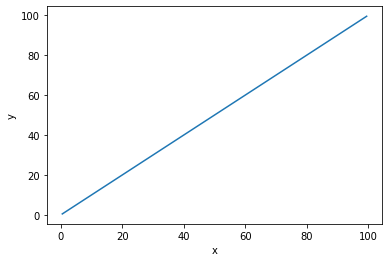

In [22]:
import numpy as np
import matplotlib.pyplot as plt

x = [x for x in np.arange(0.5, 100.0, 0.5)]
y = x

plt.plot(x, y)

plt.xlabel('x')
plt.ylabel('y')
plt.show()


ii) y = x^2

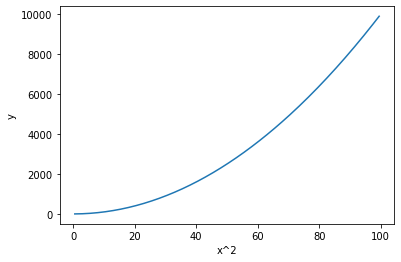

In [23]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([x for x in np.arange(0.5, 100.0, 0.5)])
y = x**2
#print(y)
plt.plot(x, y)

plt.xlabel('x^2')
plt.ylabel('y')
plt.show()

iii) y = x^3/100

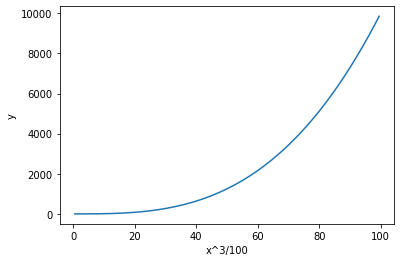

In [24]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([x for x in np.arange(0.5, 100.0, 0.5)])
y = x**3/100
#print(y)

plt.plot(x, y)

plt.xlabel('x^3/100')
plt.ylabel('y')
plt.show()

iv) y = sin(x)

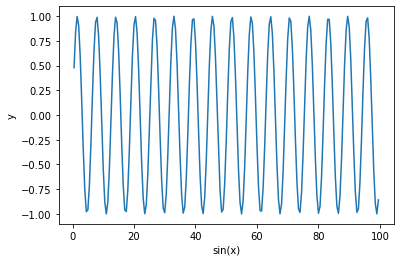

In [25]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([x for x in np.arange(0.5, 100.0, 0.5)])
y = np.sin(x)
#print(y)

plt.plot(x, y)

plt.xlabel('sin(x)')
plt.ylabel('y')
plt.show()

v) y = sin(x)/x

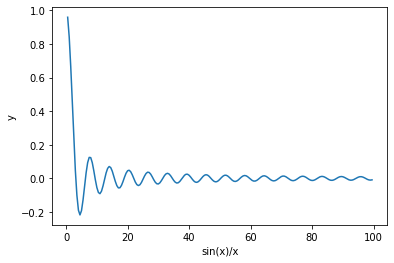

In [27]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([x for x in np.arange(0.5, 100.0, 0.5)])
y = np.sin(x)/x
#print(y)

plt.plot(x, y)

plt.xlabel('sin(x)/x')
plt.ylabel('y')
plt.show()

vi) y = log(x)

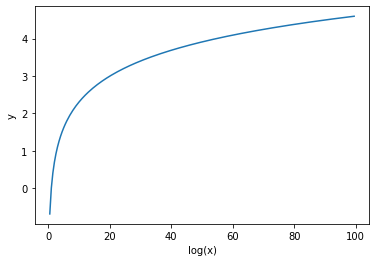

In [28]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([x for x in np.arange(0.5, 100.0, 0.5)])
y = np.log(x)
#print(y)

plt.plot(x, y)

plt.xlabel('log(x)')
plt.ylabel('y')
plt.show()

vii) y = e^x

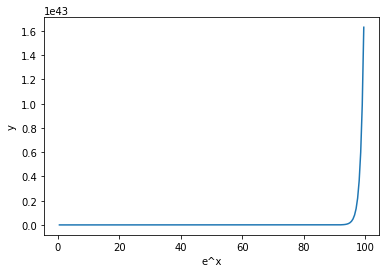

In [29]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([x for x in np.arange(0.5, 100.0, 0.5)])
y = np.exp(x)
#print(y)

plt.plot(x, y)

plt.xlabel('e^x')
plt.ylabel('y')
plt.show()

**10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.**

In [30]:
df = np.random.uniform(1, 2, (20, 5))
import pandas as pd

df = pd.DataFrame(df, columns = ['a', 'b', 'c', 'd', 'e'])
#print(df)
s = df.std()
m = df.mean(axis = 1)
print("Column with the highest standard deviation is:", s.idxmax())
print("Row with the lowest mean is:", m.idxmin())

Column with the highest standard deviation is: b
Row with the lowest mean is: 8


**11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.**

In [31]:
f = df['a'] + df['b'] + df['c'] + df['d'] + df['e']
df['f'] = f
g = np.where(df['f'] > 8, 'GT8', 'LT8')
df['g'] = g

In [32]:
df

,a,b,c,d,e,f,g
0,1.557993,1.146070,1.058234,1.759398,1.326919,6.848614,LT8
1,1.719572,1.520881,1.449340,1.512084,1.077924,7.279801,LT8
2,1.440364,1.000636,1.367541,1.479108,1.648701,6.936349,LT8
3,1.776329,1.407632,1.338974,1.437981,1.628234,7.589150,LT8
4,1.297127,1.679813,1.773741,1.633529,1.851971,8.236180,GT8
5,1.092287,1.885269,1.931597,1.798339,1.850124,8.557616,GT8
6,1.708316,1.359224,1.090678,1.756859,1.304163,7.219240,LT8
7,1.898278,1.011968,1.739638,1.318670,1.803344,7.771898,LT8
8,1.170154,1.160739,1.414281,1.105746,1.764707,6.615627,LT8
9,1.182316,1.551734,1.745014,1.271068,1.069973,6.820106,LT8


In [33]:
num_rows = df[df['g'] == 'LT8'].shape[0]
print(num_rows)

16


In [34]:
df['f'].groupby(df['g']).std()

g
GT8    0.374841
LT8    0.418001
Name: f, dtype: float64

**12. Write a small piece of code to explain broadcasting in numpy.**

Broadcasting you to perform elementwise arithmetic operations on arrays with different shapes without any need to reshaping. Smaller array is broadcasted over larger array such that they have compatible shape. For example,

In [35]:
a = np.array([1, 2, 3])
b = 2
print(a*b)
#Here "b" broadcast to match the size of "a"
#This is similar to [1, 2, 3] * [2, 2, 2]

[2 4 6]


In [36]:
a = np.array([[10, 20, 30], [40, 50, 60], [70, 80, 90]])
b = np.array([1, 2, 3])
print(a + b)
#Here "b" broadcast to match the size of "a"
# This is similar to [[10, 20, 30]    [[1, 2, 3]
#                     [40, 50, 60]  +  [1, 2, 3]
#                     [70, 80, 90]]    [1, 2, 3]]

[[11 22 33]
 [41 52 63]
 [71 82 93]]


**13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.**

In [37]:
import numpy as np

def compute_argmin(arr):
    return arr.argmin()

arr = np.array([1, 5, 4, 2, 3, 0, 7, 6, 8])
print(compute_argmin(arr))


5


In [38]:
def check(arr):
  return compute_argmin(arr) == np.argmin(arr)

check(arr)

True